something about the program

In [123]:
# manage imports
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# data loading and preperation

anomaly_data = np.loadtxt("GLB.Ts+dSST_clean.txt", skiprows=9)

cols = np.loadtxt('GLB.Ts+dSST_clean.txt', skiprows=9)
year_data = cols[:, 0]
annual_temp_anomaly = cols[:, 13]

# Calculate the actual annual temperature anomaly
annual_temp_anomaly = annual_temp_anomaly/100.


min_year:int = int(anomaly_data[:, 0][0])
max_year:int = int(anomaly_data[:, 0][len(anomaly_data)-1])




In [125]:
# program

ex:bool = False

# get input
while not ex:
    try:
        interval:int = int(input("Enter an odd window size. (eg. 5)"))
        #print(raw_yr_interval)
    except ValueError:
        print("Please enter a numerical value. (eg. 5)")
        continue

    if interval % 2 == 0:
        print("Enter an odd year window size.")
        continue
    if interval < 2:
        print("Enter a window size greater than 1.")
        continue
    if interval > (max_year - min_year) - 1 :
        print(f"Window size is too big, (max allowed {max_year - min_year - 1}).\nPlease enter a smaller value.")
        continue

    ex = True

interval_slice = interval // 2

first_year = min_year + interval_slice
last_year = max_year - interval_slice

first_year_index = np.where(year_data == first_year)[0][0]
last_year_index = np.where(year_data == last_year)[0][0]


In [126]:
# calculate moving average

# create arrays
moving_year_data = np.empty(len(year_data)-(interval-1))
moving_annual_temp_anomaly = np.empty(len(moving_year_data))

# Calculate the moving average
moving_year_index = 0
for year_index in range(first_year_index, last_year_index + 1):
    # obtain temperature anomaly subset
    anomaly_subset = annual_temp_anomaly[(year_index - interval_slice):(year_index + interval_slice)]
    temp_anomaly_mean = np.mean(anomaly_subset)
    moving_year_data[moving_year_index] = year_data[year_index]
    moving_annual_temp_anomaly[moving_year_index] = temp_anomaly_mean
    moving_year_index = moving_year_index + 1

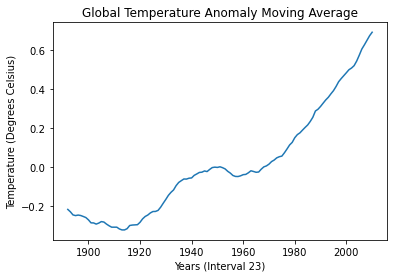

In [127]:
# make graph

plt.plot(moving_year_data, moving_annual_temp_anomaly)
plt.xlabel(f"Years (Interval {interval})")
plt.ylabel("Temperature (Degrees Celsius)")
plt.title("Global Temperature Anomaly Moving Average")


plt.show()
